In [37]:
import sys
sys.path.append('../')
import pickle
import matplotlib.pyplot as plt
from array import array
import ROOT 
from ROOT import TH1D

In [15]:
%%cpp
TH1D fill_histo(std::vector<double> values, int n_bins, double v_min, double v_max){
    TH1D histo("h", "", n_bins, v_min, v_max);
    for (int i=0; i<values.size(); i++){
        histo.Fill(values.at(i));
    }
    return histo;
};

In [16]:
def set_hist_style(h, title, title_x, title_y):
    h.GetYaxis().SetTitle(title_y)
    h.GetYaxis().SetLabelSize(0.05)
    h.GetYaxis().SetTitleSize(0.05)
    h.GetYaxis().SetTitleOffset(1.2)
    
    h.GetXaxis().SetTitle(title_x)
    h.GetXaxis().SetLabelSize(0.05)
    h.GetXaxis().SetTitleSize(0.05)
    h.GetXaxis().SetTitleOffset(1.2)
    
    return h

In [22]:
result_dir = "/Users/mascella/workspace/disp_muon_studies/Results/"
tag = '220819_noSVprob_cut'
with open(result_dir + f'result_{tag}.pkl', 'rb') as f:
    result = pickle.load(f)

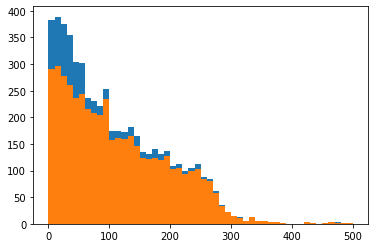

In [23]:
plt.hist(result["den_dxy_gen"]["LL"].value, range=[0, 500], bins=50)
plt.hist(result["num_dxy_gen"]["LL"].value, range=[0, 500], bins=50)
plt.show()

In [26]:
c = ROOT.TCanvas("c", "", 1)
with open(result_dir + f'result_{tag}.pkl', 'rb') as f:
    result = pickle.load(f)
num = array("d", result["num_dxy_gen"]["LL"].value)
den = array("d", result["den_dxy_gen"]["LL"].value)
# c = ROOT.TCanvas("c2", "", 1)
hist_num = ROOT.fill_histo(num, 50, 0, 500)
hist_den = ROOT.fill_histo(den, 50, 0, 500)
ratio = ROOT.TGraphAsymmErrors()
ratio.Divide(hist_num, hist_den)
ratio.SetLineColor(ROOT.kBlue)
ratio.SetMarkerColor(ROOT.kBlue)
ratio.SetMarkerStyle(20)
ratio.SetMarkerSize(0.5)
# hist.SetStats(0)
ratio = set_hist_style(ratio, "", "L_{xy} [cm]", "Efficiency")
ratio.Draw("AP")
ROOT.gPad.SetLeftMargin(0.2)
ROOT.gPad.SetBottomMargin(0.2)

# c.Print("Eff_dxy_gen_noProb_cut_dsLL.pdf")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: pdf file Eff_dxy_gen_noProb_cut_dsLL.pdf has been created


In [34]:
c = ROOT.TCanvas("c", "", 1)
mg = ROOT.TMultiGraph("mg","")
tag_dict = {'220819_noSVprob_cut': "No SV prob. cut", '220819_SVprob_cut_1e-3':  "SV prob. > 0.001"}
colors = [ROOT.kBlue, ROOT.kRed]
for i, tag in enumerate(tag_dict):
    with open(result_dir + f'result_{tag}.pkl', 'rb') as f:
        result = pickle.load(f)
    num = array("d", result["num_dxy_gen"]["HNL1"].value)
    den = array("d", result["den_dxy_gen"]["HNL1"].value)
    # c = ROOT.TCanvas("c2", "", 1)
    hist_num = ROOT.fill_histo(num, 50, 0, 500)
    hist_den = ROOT.fill_histo(den, 50, 0, 500)
    ratio = ROOT.TGraphAsymmErrors()
    ratio.Divide(hist_num, hist_den)
    ratio.SetLineColor(colors[i])
    ratio.SetMarkerColor(colors[i])
    ratio.SetMarkerStyle(20)
    ratio.SetMarkerSize(0.5)
    ratio.SetTitle(tag_dict[tag])
    mg.Add(ratio)
ROOT.gPad.SetLeftMargin(0.2)
ROOT.gPad.SetBottomMargin(0.2)
mg = set_hist_style(mg, "", "L_{xy} [cm]", "Efficiency")
mg.Draw("ap")
c.BuildLegend()

c.Print("Eff_dxy_gen_compare_dsHNL1.pdf")
# c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Info in <TCanvas::Print>: pdf file Eff_dxy_gen_compare_dsHNL1.pdf has been created


In [42]:
from muon_analysis import MuonAnalysis
print(MuonAnalysis.get_selections())
for sel in MuonAnalysis.get_selections():
    print(result[f"n_ev_{sel}"]["LL"])

['two_muons_acc', 'two_dsa', 'dsa_selection', 'gen_matching', 'converging_fit', 'sv_prob_cut']
13737
6893
6893
6535
6461
5591
